In [3]:
# Imports 
import numpy as np
import pandas as pd
import os
import pickle
import random
import matplotlib.pyplot as plt

# Image processing imports
from PIL import Image
from tensorflow.keras.utils import load_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Progress bar
from tqdm.notebook import tqdm_notebook

# PCA and KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

> I'll eventually get around to dealing with these error messages.
>
> Apparently, these are *warnings* not errors.

> The following code is adapted from Gabe Flomo's [tutorial](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34) on clustering images by similarity.


In [2]:
# Helper function for letterboxing an image into a square
def letterbox(img):
    width = img.size[0]
    height = img.size[1]
    size = max(width, height)
    new_img = Image.new(img.mode, (size, size), (255, 255, 255))
    
    if height > width:
        padding = int(0.5 * (height - width))
        new_img.paste(img, (padding, 0))
    else:
        padding = int(0.5 * (width - height))
        new_img.paste(img, (0, padding))
    return new_img

In [3]:
# Construct the model
model = VGG16()
# Remove the output layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
model

2023-01-02 12:40:14.978955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-02 12:40:14.978997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (michael-XPS-8700): /proc/driver/nvidia/version does not exist
2023-01-02 12:40:14.979303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load and resize the images. The columns of the image_data list is vessel_ID
# followed by image_ID
vessel_ids = []
image_ids = []
images = []
feature_vectors = []
for filename in tqdm_notebook(os.listdir('../images/')):
    try:
        # Open the image, resize it, and convert it to a numpy array
        image = load_img('../images/' + filename)
        image = letterbox(image)
        image.thumbnail((224, 224))
        image = np.asarray(image)
        image = image.reshape(1, 224, 224, 3)
        
        # Convert the image to a feature vector
        image = preprocess_input(image)
        feature_vector = model.predict(image)
        
        # Get the vessel id and image id from the filename
        temp = filename.split('_')
        
        # Store the images, features, and ids in lists
        vessel_ids.append(temp[1])
        image_ids.append(temp[2][:-4])
        images.append(image)
        feature_vectors.append(feature_vector)
    except:
        # Keep track of the files we couldn't open.
        print('Could not open', filename)
        #with open('bad_files.txt', 'a') as f:
        #    f.write(filename + '\n')

  0%|          | 0/9994 [00:00<?, ?it/s]

1/1 [==============================] - 0s 159ms/step
Could not open drawing_23361_25661.jpg
1/1 [==============================] - 0s 155ms/step
Could not open drawing_26734_33815.jpg
1/1 [==============================] - 0s 169ms/step
Could not open drawing_12371_3632.jpg
1/1 [==============================] - 0s 146ms/step
Could not open drawing_88_99.jpg
1/1 [==============================] - 0s 152ms/step
Could not open drawing_15893_10790.jpg
1/1 [==============================] - 0s 156ms/step
Could not open drawing_15881_10780.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_415_500.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_25411_31203.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26462_33470.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26972_34216.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27647_36184.jpg

Could not open drawing_16094_11216.jpg
1/1 [==============================] - 0s 153ms/step
Could not open drawing_233_271.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_27640_36192.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26431_33501.jpg
Could not open drawing_16834_33450.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_495_653.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15234_9546.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15020_9048.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26984_34204.jpg
1/1 [==============================] - 0s 146ms/step
Could not open drawing_23352_25645.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15149_9369.jpg
Could not open drawing_16291_11547.jpg
1/1 [==============================] - 0s 139ms/step
Could not ope

1/1 [==============================] - 0s 142ms/step
Could not open drawing_26566_33683.jpg
Could not open drawing_12052_2944.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26798_34060.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12293_3489.jpg
Could not open drawing_26741_33806.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_17964_14649.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26641_33756.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26817_34020.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_27654_36129.jpg
Could not open drawing_11771_2408.jpg
Could not open drawing_26704_33849.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_16135_11297.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_15260_9585.jpg
1/1 [===============

1/1 [==============================] - 0s 139ms/step
Could not open drawing_26539_33533.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_27817_38877.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26733_33816.jpg
Could not open drawing_19806_16319.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_11769_2404.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_22830_24823.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27308_35326.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27833_38893.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_26699_33854.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_188_214.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_662_968.jpg
1/1 [==============================] - 0s 142ms/st

1/1 [==============================] - 0s 152ms/step
Could not open drawing_12309_3516.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_15860_10759.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_15302_9645.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27747_38820.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_17937_14645.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_27863_38911.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_11994_2832.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26957_34152.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_22813_24791.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26288_33270.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27847_3

1/1 [==============================] - 0s 139ms/step
Could not open drawing_26814_34023.jpg
1/1 [==============================] - 0s 158ms/step
Could not open drawing_831_1424.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_1130_1742.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26541_33531.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16249_11483.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26841_33992.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16113_11246.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26718_33834.jpg
Could not open drawing_15898_10795.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26672_33725.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12297_3497.jpg
1/1 [==============================] - 0s 139ms

1/1 [==============================] - 0s 138ms/step
Could not open drawing_26701_33852.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_59_70.jpg
1/1 [==============================] - 0s 152ms/step
Could not open drawing_26581_33897.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26438_33494.jpg
1/1 [==============================] - 0s 149ms/step
Could not open drawing_15096_9417.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26256_33302.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_16119_11252.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_27206_35123.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26818_34019.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27930_37594.jpg
Could not open drawing_27801_38851.jpg
1/1 [==============================] - 0s 140ms/

1/1 [==============================] - 0s 157ms/step
Could not open drawing_26449_33483.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12290_3484.jpg
Could not open drawing_489_640.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_658_964.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26820_34017.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27908_38951.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27016_34171.jpg
Could not open drawing_12181_3215.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26885_34036.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16095_11220.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_27810_38864.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27651_36199.jpg
1/1 [=======

1/1 [==============================] - 0s 139ms/step
Could not open drawing_15154_9380.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_15971_10888.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26750_33795.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26642_33755.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26724_33827.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26996_34192.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27825_38885.jpg
Could not open drawing_15096_9257.jpg
1/1 [==============================] - 0s 151ms/step
Could not open drawing_27650_36200.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26118_33028.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26842_33991.jpg
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 138ms/step
Could not open drawing_574_836.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_350_428.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_660_966.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15872_10771.jpg
Could not open drawing_16056_11163.jpg
Could not open drawing_14891_8626.jpg
Could not open drawing_16289_11545.jpg
Could not open drawing_23352_25647.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12244_3376.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26763_33781.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_1251_1850.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_71_82.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15897_10794.jpg
1/1 [==============================] -

1/1 [==============================] - 0s 142ms/step
Could not open drawing_27892_38932.jpg
Could not open drawing_16053_11157.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_26667_33730.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_14716_8142.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_16240_11447.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_16077_11194.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27858_38909.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26643_33754.jpg
1/1 [==============================] - 0s 247ms/step
Could not open drawing_22825_24803.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26646_33751.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_16054_11159.jpg
Could not open drawing_16108_11241.jpg
1/1

1/1 [==============================] - 0s 138ms/step
Could not open drawing_16285_11541.jpg
Could not open drawing_15918_10815.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12079_3003.jpg
Could not open drawing_25775_32432.jpg
Could not open drawing_15082_9204.jpg
Could not open drawing_14660_7991.jpg
1/1 [==============================] - 0s 212ms/step
Could not open drawing_16063_11177.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12320_3539.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_16066_11181.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26661_33736.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26430_33502.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26703_33850.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26421_33512.jpg
1/1 [===============

1/1 [==============================] - 0s 139ms/step
Could not open drawing_12305_3510.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_136_147.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12225_3332.jpg
Could not open drawing_26981_34207.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_26789_34043.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_15889_10787.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_16280_11536.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_24407_27758.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26977_34211.jpg
1/1 [==============================] - 0s 228ms/step
Could not open drawing_26951_34158.jpg
1/1 [==============================] - 0s 253ms/step
Could not open drawing_24690_28850.jpg
1/1 [==============================] - 0s 223ms

1/1 [==============================] - 0s 138ms/step
Could not open drawing_26751_33794.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_16292_11548.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27645_36186.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26652_33745.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12389_3659.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26666_33731.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26895_34026.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26447_33485.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26781_33974.jpg
1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 139ms/step
Could not open drawing_26892_34029.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_14784_8303.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_285_335.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_12202_3265.jpg
1/1 [==============================] - 0s 156ms/step
Could not open drawing_15895_10792.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26660_33737.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_129_140.jpg
1/1 [==============================] - 0s 166ms/step
Could not open drawing_27010_34178.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26444_33488.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12311_3521.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_1131_1746.jpg
1

1/1 [==============================] - 0s 138ms/step
Could not open drawing_820_1401.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_16097_11239.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27773_38833.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_16040_11136.jpg
Could not open drawing_16833_33459.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26889_34032.jpg
Could not open drawing_27769_38831.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_12151_3147.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_25191_30321.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26543_33528.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_648_954.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_27746_38819.jpg
1/1 [=====

1/1 [==============================] - 0s 140ms/step
Could not open drawing_27812_38869.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_19812_16324.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_15913_10810.jpg
1/1 [==============================] - 0s 151ms/step
Could not open drawing_26810_34047.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_24971_29657.jpg
Could not open drawing_27649_36201.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26953_34172.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26654_33743.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_85_96.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_23653_26152.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_24704_28903.jpg
1/1 [==============================] - 0s 143ms

1/1 [==============================] - 0s 143ms/step
Could not open drawing_19810_16323.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_16131_11274.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_23362_25663.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26416_33517.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_25912_32898.jpg
1/1 [==============================] - 0s 152ms/step
Could not open drawing_16035_11130.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_12213_3302.jpg
Could not open drawing_21680_21145.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_27868_38914.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27652_36183.jpg
Could not open drawing_500_658.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_14760_8248.jpg
1/1 [===

1/1 [==============================] - 0s 139ms/step
Could not open drawing_473_600.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_15857_10756.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27657_36127.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_387_461.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_16140_11286.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_24816_29265.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26747_33798.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_11527_2044.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_620_919.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_355_433.jpg
Could not open drawing_15906_10803.jpg
1/1 [==============================] - 0s 140ms/step
Could

1/1 [==============================] - 0s 142ms/step
Could not open drawing_11877_2613.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_14682_8047.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_1182_1839.jpg
Could not open drawing_12068_2981.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_417_503.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15858_10757.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26727_33800.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_26970_34218.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_15901_10798.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27911_38956.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_27909_38953.jpg
1/1 [==============================] - 0s 141ms/st

1/1 [==============================] - 0s 142ms/step
Could not open drawing_22775_24750.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27219_35089.jpg
Could not open drawing_26656_33741.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27956_38813.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15175_9432.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_87_98.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_16123_11258.jpg
1/1 [==============================] - 0s 146ms/step
Could not open drawing_26729_33822.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26434_33498.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_16122_11256.jpg
1/1 [==============================] - 0s 165ms/step
Could not open drawing_841_1460.jpg
1/1 [==============================] - 0s 139ms/ste

1/1 [==============================] - 0s 140ms/step
Could not open drawing_14595_7799.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12144_3128.jpg
1/1 [==============================] - 0s 157ms/step
Could not open drawing_26668_33729.jpg
1/1 [==============================] - 0s 200ms/step
Could not open drawing_26809_34048.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_25443_31507.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27916_38969.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12093_3030.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_26148_33161.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_1123_1714.jpg
Could not open drawing_26698_33855.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_25890_32921.jpg
1/1 [==============================] - 0s 143m

1/1 [==============================] - 0s 154ms/step
Could not open drawing_27756_38825.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26450_33482.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27214_35095.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_161_177.jpg
Could not open drawing_27341_35368.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_16102_11233.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_12128_3096.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_16099_11224.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12243_3373.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16233_11402.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26683_33714.jpg
1/1 [==============================] - 0s 140ms

1/1 [==============================] - 0s 153ms/step
Could not open drawing_74_85.jpg
1/1 [==============================] - 0s 149ms/step
Could not open drawing_12188_3231.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_494_652.jpg
1/1 [==============================] - 0s 151ms/step
Could not open drawing_16059_11171.jpg
1/1 [==============================] - 0s 146ms/step
Could not open drawing_11849_2553.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_23352_25644.jpg
1/1 [==============================] - 0s 150ms/step
Could not open drawing_68_79.jpg
1/1 [==============================] - 0s 149ms/step
Could not open drawing_15894_10791.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_16107_11240.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_15964_10878.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_16096_11219.jpg
1/1 [=

1/1 [==============================] - 0s 146ms/step
Could not open drawing_21872_21768.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_25528_31749.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_16294_11550.jpg
1/1 [==============================] - 0s 151ms/step
Could not open drawing_64_75.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_26965_34223.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_26768_33776.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_15920_10817.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_27752_38823.jpg
1/1 [==============================] - 0s 161ms/step
Could not open drawing_26146_33168.jpg
1/1 [==============================] - 0s 149ms/step
Could not open drawing_26743_33804.jpg
1/1 [==============================] - 0s 146ms/step
Could not open drawing_542_781.jp

1/1 [==============================] - 0s 148ms/step
Could not open drawing_15211_9507.jpg
1/1 [==============================] - 0s 149ms/step
Could not open drawing_27388_35419.jpg
Could not open drawing_25516_31700.jpg
1/1 [==============================] - 0s 150ms/step
Could not open drawing_27822_38882.jpg
1/1 [==============================] - 0s 147ms/step
Could not open drawing_26632_33765.jpg
1/1 [==============================] - 0s 150ms/step
Could not open drawing_15867_10766.jpg
1/1 [==============================] - 0s 150ms/step
Could not open drawing_26992_34196.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_26579_33832.jpg
1/1 [==============================] - 0s 156ms/step
Could not open drawing_27928_37587.jpg
1/1 [==============================] - 0s 148ms/step
Could not open drawing_16236_11482.jpg
1/1 [==============================] - 0s 159ms/step
Could not open drawing_26172_33386.jpg
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 139ms/step
Could not open drawing_27804_38853.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26804_34053.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_22819_24797.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26420_33513.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26961_34228.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_463_577.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_15059_9157.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_15890_10788.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_16078_11195.jpg
Could not open drawing_12281_3466.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26136_33010.jpg
1/1 [==============================] - 0s 143ms

1/1 [==============================] - 0s 138ms/step
Could not open drawing_1127_1728.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12168_3180.jpg
Could not open drawing_15162_9397.jpg
Could not open drawing_310_370.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_16101_11229.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_24410_27764.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_633_934.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27846_38903.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_27302_35319.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_27821_38881.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27859_38910.jpg
1/1 [==============================] - 0s 200ms/step
Could not open drawing_26705_33848.jpg
Could not open

1/1 [==============================] - 0s 140ms/step
Could not open drawing_11776_2420.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26958_34231.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_364_442.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26627_33770.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26673_33724.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_845_1469.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12101_3051.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26145_33189.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_15146_9361.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_67_78.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_11958_2773.jpg
1/1 [

1/1 [==============================] - 0s 155ms/step
Could not open drawing_19808_16321.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12250_3390.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_16066_11183.jpg
Could not open drawing_491_646.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15091_9246.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16259_11499.jpg
Could not open drawing_16134_11280.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_12262_3428.jpg
Could not open drawing_26991_34197.jpg
1/1 [==============================] - 0s 145ms/step
Could not open drawing_26459_33473.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26719_33833.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_1124_1716.jpg
Could not open drawing_27807_38859.jpg
1/1 [====================

1/1 [==============================] - 0s 141ms/step
Could not open drawing_12287_3478.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15098_9262.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_26765_33779.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26748_33797.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_325_391.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26710_33843.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_357_435.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_26665_33732.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_813_1385.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_408_488.jpg
1/1 [==============================] - 0s 180ms/step
Could not open drawing_23352_25646.jpg
1/1 [

1/1 [==============================] - 0s 139ms/step
Could not open drawing_15192_9475.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_26626_33771.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_14942_8806.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_26811_34046.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_11514_2024.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12267_3440.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27666_36177.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_15878_10777.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_27008_34180.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_22803_24780.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_15919_10

1/1 [==============================] - 0s 138ms/step
Could not open drawing_487_638.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26897_34024.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_25569_32151.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_25979_33151.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_16295_11551.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_12223_3327.jpg
1/1 [==============================] - 0s 144ms/step
Could not open drawing_26441_33491.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27644_36187.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_28763_40672.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_27870_38916.jpg
Could not open drawing_14774_8277.jpg
Could not open drawing_16042_11138.jpg
1/1 [===

1/1 [==============================] - 0s 139ms/step
Could not open drawing_15077_9191.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_12264_3434.jpg
Could not open drawing_11860_2575.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_1094_1635.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15150_9372.jpg
Could not open drawing_491_648.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_28762_40673.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_27785_38838.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_15967_10882.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_22785_24761.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_12341_3585.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26423_33509.jpg
1/1 [========

1/1 [==============================] - 0s 139ms/step
Could not open drawing_1183_1851.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_16214_11446.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_26456_33476.jpg
Could not open drawing_26355_33255.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_16253_11485.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_16127_11267.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_26549_33522.jpg
Could not open drawing_372_449.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_23352_25648.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_15215_9515.jpg
1/1 [==============================] - 0s 138ms/step
Could not open drawing_27670_36173.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27795_38845.jpg
1/1 [====

1/1 [==============================] - 0s 142ms/step
Could not open drawing_337_411.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_483_630.jpg
1/1 [==============================] - 0s 142ms/step
Could not open drawing_15966_10881.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_26805_34052.jpg
Could not open drawing_15159_9389.jpg
1/1 [==============================] - 0s 141ms/step
Could not open drawing_14738_8193.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_26624_33773.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_19800_16315.jpg
1/1 [==============================] - 0s 139ms/step
Could not open drawing_27798_38848.jpg
Could not open drawing_15916_10813.jpg
1/1 [==============================] - 0s 143ms/step
Could not open drawing_652_958.jpg
1/1 [==============================] - 0s 140ms/step
Could not open drawing_27648_36182.jpg
1/1 [===========

In [7]:
# Store the ids and images in a dataframe
df = pd.DataFrame(list(zip(vessel_ids, 
                           image_ids, 
                           images, 
                           feature_vectors)),
                  columns = ['vessel_ID',
                             'image_ID',
                             'image',
                             'feature_vectors'])
df.head()

,vessel_ID,image_ID,image,feature_vectors
0,18688,15819,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.37931985, 0.0, 0.15367365, 1.3902303, 0.0,..."
1,17496,13961,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.3179601, 1.0356449, 0.0, 0.0, 0.0, 2...."
2,17334,13780,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.68917066, 0.0, 2.6776593, 0.0, 0.0, 3..."
3,19762,18235,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.029503465, 0.4463769, 0.046591878, 0.70729..."
4,28755,40646,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.113509804, 0.0, 0.0, 0.15061232, 0.0,..."


In [9]:
# Save the data to a pickle file
#df.to_pickle('image_data.pkl')

In [13]:
feature_vectors = df['feature_vectors']

<class 'pandas.core.series.Series'>
RangeIndex: 8811 entries, 0 to 8810
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
8811 non-null   object
dtypes: object(1)
memory usage: 69.0+ KB


In [2]:
# Load the pickle file
df = pd.read_pickle('image_data.pkl')

In [6]:
# Get the feature vectors. I'm not sure why these steps work. I need to
# study this more.
fv = df['feature_vectors']
fv = np.array(list(fv))
fv = fv.reshape(-1, 4096)

In [7]:
# Use PCA to compress the feature vectors
pca = PCA(n_components = 0.95)
pca.fit(fv)
fv = pca.transform(fv)

In [8]:
# Get the shape of the transformed data
fv.shape

(8811, 688)

> Observe that we were able to reduce the feature vectors to a length of 688 as opposed to 4096 while keeping the explained variance at 95%. Not bad!

In [37]:
# Save the compressed data to a pickle file
df['feature_vectors'] = list(fv)
#df.to_pickle('compressed_image_data.pkl')

> Compressing the feature vector only saved about 0.2 gigs of space. Most of the pickle file is due to the images. Since we can load the images at any time, it's probably not worth saving the images in the pickle file, and loading them as necessary using the saved ids.
>
> The following code is messy and uncommented. Needs to be cleaned up.

In [9]:
# Find the optimal number of clusters
inertias = []
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(fv)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(fv, kmeans.labels_))

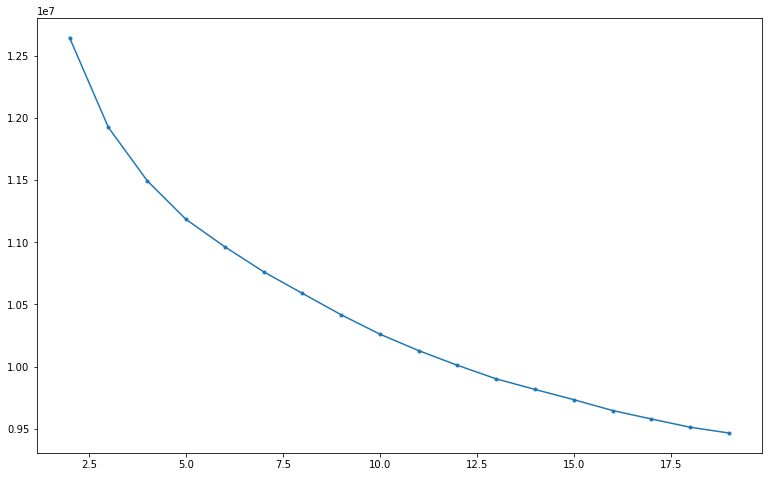

In [15]:
# Graph the inertias
plt.figure(figsize = (13, 8))
plt.plot(range(2, 20), inertias, marker = '.')

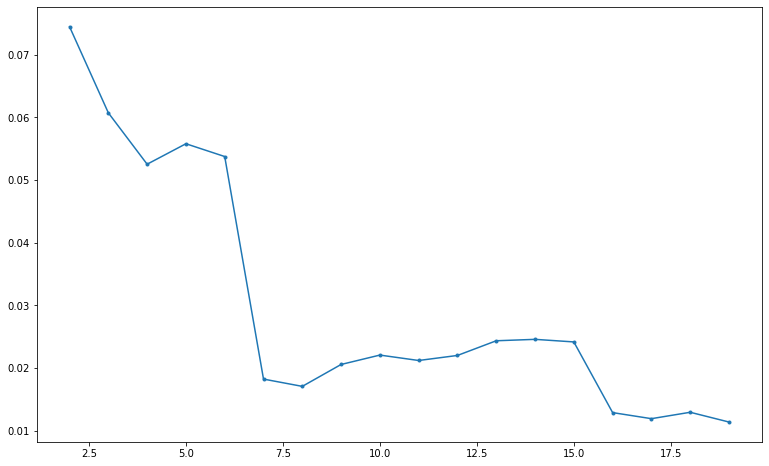

In [16]:
# Graph the silhouette scores
plt.figure(figsize = (13, 8))
plt.plot(range(2, 20), silhouette_scores, marker = '.')

> We will try two models. One using three clusters, and one using four clusters.

In [17]:
# Build the three cluster model
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(fv)

KMeans(n_clusters=3)

In [18]:
# Build the four cluster model
kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(fv)

KMeans(n_clusters=4)

In [19]:
# Append the labels for the three cluster model to the data frame
df3 = df.copy()
df3['labels'] = kmeans3.labels_
df3.head()

,vessel_ID,image_ID,image,feature_vectors,labels
0,18688,15819,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.37931985, 0.0, 0.15367365, 1.3902303, 0.0,...",1
1,17496,13961,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.3179601, 1.0356449, 0.0, 0.0, 0.0, 2....",2
2,17334,13780,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.68917066, 0.0, 2.6776593, 0.0, 0.0, 3...",1
3,19762,18235,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.029503465, 0.4463769, 0.046591878, 0.70729...",1
4,28755,40646,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.113509804, 0.0, 0.0, 0.15061232, 0.0,...",2


In [20]:
# Append the labels for the four cluster model to the data frame
df4 = df.copy()
df4['labels']= kmeans4.labels_
df4.head()

,vessel_ID,image_ID,image,feature_vectors,labels
0,18688,15819,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.37931985, 0.0, 0.15367365, 1.3902303, 0.0,...",2
1,17496,13961,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.3179601, 1.0356449, 0.0, 0.0, 0.0, 2....",0
2,17334,13780,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.68917066, 0.0, 2.6776593, 0.0, 0.0, 3...",2
3,19762,18235,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.029503465, 0.4463769, 0.046591878, 0.70729...",2
4,28755,40646,"[[[[151.061 138.22101 131.32 ], [151.061 ...","[[0.0, 0.113509804, 0.0, 0.0, 0.15061232, 0.0,...",1


In [22]:
# Look at the counts of the clusters
display(df3['labels'].value_counts())
display(df4['labels'].value_counts())

1    3323
2    3248
0    2240
Name: labels, dtype: int64

2    2795
0    2674
1    1922
3    1420
Name: labels, dtype: int64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


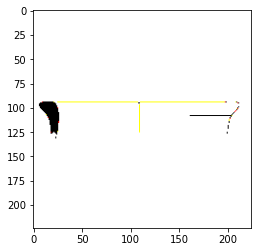

In [66]:
plt.imshow(df['image'][50].reshape(224, 224, 3))

In [23]:
# Save the clusters
df3[['vessel_ID', 'image_ID', 'labels']].to_csv('three_cluster_model_labels.csv')
df4[['vessel_ID', 'image_ID', 'labels']].to_csv('four_cluster_model_labels.csv')
#df[['vessel_ID', 'image_ID', 'labels']].to_csv('cluster_labels_with_ids.csv')